## Classical Implementation of Strength of Schedule

Here we use a package to evaluate and rank the strengths of 4 teams (found in the node list). The node list is interpreted as (1,0) means that team 1 beat team 0; whereas (0,1) represents the fact that team 0 beat team 1.

In [31]:
import choix
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [32]:
###interpret as: team 1 beat team 0, team 0 beat team 4, team 3 beat team 1, ....#####

n_items = 5
nodes = [
    (1, 0), (0, 4), (3, 1),
    (0, 2), (2, 4), (4, 3)]

In [33]:
params = choix.ilsr_pairwise(5, nodes )

In [34]:
print("ranking (worst to best):", np.argsort(params))

ranking (worst to best): [4 3 2 1 0]


In [35]:
def get_edges(graph):
    Nv = len(graph)
    edges = np.zeros((Nv, Nv))
    for i in range(Nv - 1):
        xi, yi = graph[i]
        for j in range(i + 1, Nv):
            xj, yj = graph[j]
            dij = np.sqrt((xi - xj) ** 2. + (yi - yj) ** 2.)
            if dij:
                edges[i, j] = 1
    return np.argwhere(edges > 0)

In [36]:
edges = get_edges(nodes)
G = nx.Graph()
for edge in edges:
    G.add_edge(edge[0], edge[1])

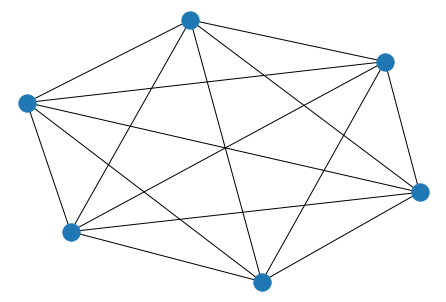

In [37]:
pos = nx.DiGraph(G)
nx.draw(G)